<a href="https://colab.research.google.com/github/davidclizbe/datascience/blob/master/ClizbeModule16Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Challenge
In this module, we learned how to approach and solve regression problems using linear regression models. Throughout the module, you worked on a house price dataset from Kaggle. In this challenge, you will keep working on this dataset.

The scenario
The housing market is one of the most crucial parts of the economy for every country. Purchasing a home is one of the primary ways to build wealth and savings for people. In this respect, predicting prices in the housing market is a very central topic in economic and financial circles.

The house price dataset from Kaggle includes several features of the houses along with their sale prices at the time they are sold. So far, in this module, you built and implemented some models using this dataset.

In this challenge, you are required to improve your model with respect to its prediction performance.

To complete this challenge, submit a Jupyter notebook containing your solutions to the following tasks.



Load the houseprices data from Thinkful's database.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

houseprices = pd.read_sql_query('select * from houseprices',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [ ]:
houseprices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1460 non-null   int64  
 1   mssubclass     1460 non-null   int64  
 2   mszoning       1460 non-null   object 
 3   lotfrontage    1201 non-null   float64
 4   lotarea        1460 non-null   int64  
 5   street         1460 non-null   object 
 6   alley          91 non-null     object 
 7   lotshape       1460 non-null   object 
 8   landcontour    1460 non-null   object 
 9   utilities      1460 non-null   object 
 10  lotconfig      1460 non-null   object 
 11  landslope      1460 non-null   object 
 12  neighborhood   1460 non-null   object 
 13  condition1     1460 non-null   object 
 14  condition2     1460 non-null   object 
 15  bldgtype       1460 non-null   object 
 16  housestyle     1460 non-null   object 
 17  overallqual    1460 non-null   int64  
 18  overallc

Do data cleaning, exploratory data analysis, and feature engineering. You can use your previous work in this module. But make sure that your work is satisfactory.

In [ ]:
housedata = houseprices[['saleprice', 'lotarea', 'overallqual', 'overallcond', 'yearbuilt', 'yearremodadd']]
housedata.head()

,saleprice,lotarea,overallqual,overallcond,yearbuilt,yearremodadd
0,208500,8450,7,5,2003,2003
1,181500,9600,6,8,1976,1976
2,223500,11250,7,5,2001,2002
3,140000,9550,7,5,1915,1970
4,250000,14260,8,5,2000,2000


In [ ]:
housedata.dropna(inplace=True)

In [ ]:
housedata = pd.get_dummies(housedata, dummy_na=False)
housedata.head()

,saleprice,lotarea,overallqual,overallcond,yearbuilt,yearremodadd
0,208500,8450,7,5,2003,2003
1,181500,9600,6,8,1976,1976
2,223500,11250,7,5,2001,2002
3,140000,9550,7,5,1915,1970
4,250000,14260,8,5,2000,2000


Now, split your data into train and test sets where 20% of the data resides in the test set.

In [ ]:
y = housedata['saleprice']

X = housedata.drop('saleprice', axis=1)
X.head()

,lotarea,overallqual,overallcond,yearbuilt,yearremodadd
0,8450,7,5,2003,2003
1,9600,6,8,1976,1976
2,11250,7,5,2001,2002
3,9550,7,5,1915,1970
4,14260,8,5,2000,2000


In [ ]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: saleprice, dtype: int64

(array([148., 723., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <a list of 10 Patch objects>)

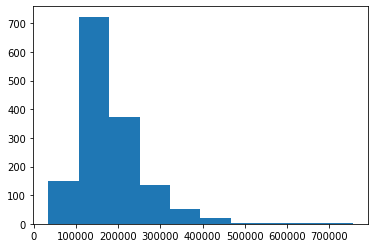

In [ ]:
plt.hist(y)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.head()

,lotarea,overallqual,overallcond,yearbuilt,yearremodadd
1064,11000,5,6,1966,1966
1035,11500,4,3,1957,1957
706,115149,7,5,1971,2002
380,8123,6,5,2000,2000
106,9375,8,5,2003,2004


Build several linear regression models including Lasso, Ridge, or ElasticNet and train them in the training set. Use k-fold cross-validation to select the best hyperparameters if your models include one!

In [ ]:
X_train.isna().sum()

lotarea         0
overallqual     0
overallcond     0
yearbuilt       0
yearremodadd    0
dtype: int64

In [ ]:
y_train.isna().sum()

0

In [ ]:
import statsmodels.api as sm
import numpy as np
X_train2 = sm.add_constant(X_train)
model = sm.OLS(y_train,X_train2)
results = model.fit()
results.params

const          -1.105736e+06
lotarea         1.433220e+00
overallqual     3.922638e+04
overallcond     1.246328e+03
yearbuilt       2.400813e+02
yearremodadd    2.778934e+02
dtype: float64

In [ ]:
results.tvalues

const           -7.065559
lotarea         10.185231
overallqual     31.408626
overallcond      0.879234
yearbuilt        3.545382
yearremodadd     3.055521
dtype: float64

In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     475.3
Date:                Wed, 24 Jun 2020   Prob (F-statistic):          6.28e-278
Time:                        03:11:57   Log-Likelihood:                -14181.
No. Observations:                1168   AIC:                         2.837e+04
Df Residuals:                    1162   BIC:                         2.840e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.106e+06   1.56e+05     -7.066      0.000   -1.41e+06   -7.99e+05
lotarea          1.4332      0.141     10.185      0.000       1.157       1.709
overallqual   3.923e+04   1248.905     31.409      0.000    3.68e+04    4.17e+04
overallcond   1246.3281   1417.515      0.879      0.379   -1534.847    4027.504
yearbuilt      240.0813     67.717      3.545      0.000     107.221     372.942
yearremodadd   277.8934     90.948      3.056      0.002      99.453     456.334
==============================================================================
Omnibus:                      573.425   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10403.385
Skew:                           1.821   Prob(JB):                         0.00
Kurtosis:                      17.160   Cond. No.                     1.68e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.68e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
results.summary

<bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x7ff86c94bf98>>

In [ ]:
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV


lcv = LassoCV(cv= 5)

model = lcv.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
model.score(X_train, y_train)

0.3751819871786801

In [ ]:
model.score(X_test, y_test)

0.3963710437793806

In [ ]:
rdg = RidgeCV(cv = 5)
model = rdg.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
model.score(X_train, y_train)

0.6715814418154005

In [ ]:
model.score(X_test, y_test)

0.6708029047339799

Evaluate your best model on the test set.

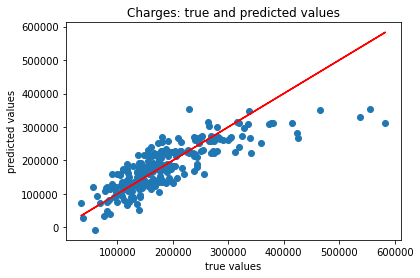

Mean absolute error of the prediction is: 32588.747749237893
Mean squared error of the prediction is: 2131619030.8346786
Root mean squared error of the prediction is: 46169.459936571475
Mean absolute percentage error of the prediction is: 18.93270243677684


In [ ]:
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import rmse, mse
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_pred)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_pred)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_pred)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_pred) / y_test)) * 100))

In [ ]:
elst = ElasticNetCV(cv = 5)
model = elst.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
model.score(X_train, y_train)

0.0703806273483989

In [ ]:
model.score(X_test, y_test)

0.05705874790324251

So far, you have only used the features in the dataset. However, house prices can be affected by many factors like economic activity and the interest rates at the time they are sold. So, try to find some useful factors that are not included in the dataset. Integrate these factors into your model and assess the prediction performance of your model. Discuss the implications of adding these external variables into your model.

The overall quality of the home was the largest contributing feature related to sales price followed by lot area. 